# Pandas (Panel Datas)
--------

## > DataFrame 인덱스 설정 및 제거

In [2]:
import numpy as np
import pandas as pd
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCDE'),
                             np.round(np.random.rand(3, 5), 2)]).T,
                   columns=["C1", "C2", "C3", "C4"])
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [3]:
# set_index 메서드로 특정 column을 인덱스로 설정가능하다.
df2 = df1.set_index("C1")
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [14]:
# 기존의 index를 제거하고 새로 지정한 index 값을 가져온다.
df2.set_index("C2")

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


In [15]:
# reset_index() 메서드로 인덱스를 보통의 자료열로 바꿀수 있다.
df2.reset_index()

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [16]:
df2 = df1.set_index("C1")
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [17]:
# drop=True 값을 reset_index()에 넣어주면 인덱스 값이 사라진다.
df2.reset_index(drop=True)

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


In [19]:
# 연습문제 1
nfl = pd.read_csv("datas/nfl.csv", parse_dates=["Birthday"], index_col=["Name"])
nfl

,Team,Position,Birthday,Salary
Name,,,,
Tremon Smith,Philadelphia Eagles,RB,1996-07-20,570000
Shawn Williams,Cincinnati Bengals,SS,1991-05-13,3500000
Adam Butler,New England Patriots,DT,1994-04-12,645000
Derek Wolfe,Denver Broncos,DE,1990-02-24,8000000
Jake Ryan,Jacksonville Jaguars,OLB,1992-02-27,1000000
...,...,...,...,...
Bashaud Breeland,Kansas City Chiefs,CB,1992-01-30,805000
Craig James,Philadelphia Eagles,CB,1996-04-29,570000
Jonotthan Harrison,New York Jets,C,1991-08-25,1500000


In [65]:
nfl.reset_index("Name").set_index("Team").loc["New York Jets"].nsmallest(1, columns=["Birthday"])

,Name,Position,Birthday,Salary
Team,,,,
New York Jets,Ryan Kalil,C,1985-03-29,2400000


In [72]:
# 연습문제 2
df3 = pd.DataFrame({"이름": ["일식", "이식", "삼식", "사식", "오식"],
                    "국어": [60, 70, 90, 80, 100],
                    "영어": [70, 86, 82, 88, 100],
                    "수학": [65, 82, 85, 90, 100]},
                   columns=["이름", "국어", "영어", "수학"])
df3

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


In [77]:
df3.set_index("이름")

,국어,영어,수학
이름,,,
일식,60,70,65
이식,70,86,82
삼식,90,82,85
사식,80,88,90
오식,100,100,100


In [80]:
df3.reset_index(drop=True)

,이름,국어,영어,수학
0,일식,60,70,65
1,이식,70,86,82
2,삼식,90,82,85
3,사식,80,88,90
4,오식,100,100,100


## > DataFrame dropna() 메서드

In [81]:
employees = pd.read_csv("datas/employees.csv", parse_dates=["Start Date"])

In [86]:
# 결측치를 갖는 행에 대해 제거/ 행에 단 하나라도 결측치가 있을 경우 해당 행 삭제
# how = "any"가 default 
employees.dropna()

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [87]:
employees.dropna(how = "all")

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [88]:
# Gender에 있는 NaN 값만 조회
employees.loc[employees.Gender.isnull()]

,First Name,Gender,Start Date,Salary,Mgmt,Team
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
20,Lois,NaN,1995-04-22,64714.0,True,Legal
22,Joshua,NaN,2012-03-08,90816.0,True,IT
27,Scott,NaN,1991-07-11,122367.0,False,Legal
31,Joyce,NaN,2005-02-20,88657.0,False,Product
...,...,...,...,...,...,...
972,Victor,NaN,2006-07-28,76381.0,True,Sales
985,Stephen,NaN,1983-07-10,85668.0,False,Legal
989,Justin,NaN,1991-02-10,38344.0,False,Legal
995,Henry,NaN,2014-11-23,132483.0,False,Distribution


In [89]:
# Gender의 NaN 값을 지워줌
employees.dropna(subset = ["Gender"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [90]:
cond1 = employees["Start Date"].isnull()
cond2 = employees["Salary"].isnull()
print(f"cond1: {cond1.sum()}, cond2: {cond2.sum()}")

cond1: 2, cond2: 2


In [91]:
employees[cond1]

,First Name,Gender,Start Date,Salary,Mgmt,Team
2,Maria,Female,NaT,130590.0,False,Finance
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [92]:
employees[cond2]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [93]:
# |는 두 값 중 하나라도 True 이면 True를 반환 / or 연산자와 동일
employees[cond1 | cond2]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
2,Maria,Female,NaT,130590.0,False,Finance
1000,NaN,NaN,NaT,NaN,NaN,NaN


In [94]:
employees.dropna(subset = ["Start Date", "Salary"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [99]:
employees[employees.notnull().sum(axis=1) >= 4]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


In [100]:
employees.dropna(how = "any", thresh = 4)

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


## > 중복처리하기 duplicated() 메서드

In [101]:
# Series 객체에서 중복을 먼저 확인
employees["Team"].head()

0    Marketing
1          NaN
2      Finance
3      Finance
4           IT
Name: Team, dtype: object

In [102]:
# duplicated() 메서드는 Series 객체를 순회하면서 한 번이라도 본적 있는 값을 True로 반환
employees["Team"].duplicated().head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

In [105]:
employees.Team.duplicated(keep = "last")

0        True
1        True
2        True
3        True
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

In [106]:
# ~ 기호는 True를 False 값으로 False를 True로 반환
first_one_in_team = ~employees["Team"].duplicated()
employees[first_one_in_team]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


## > 중복 처리하기 drop_duplicates() 메서드

In [108]:
#
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [109]:
# 특정 행에서만 중복되는 행을 제거하고자 하는 경우
employees.drop_duplicates(subset = ["Team"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


In [110]:
# 마지막에 발견된 값만 남기고 이전에 나오는 중복을 제거하고 싶을 경우 
# 가장최근에 팀에 들어온 사람들
employees.drop_duplicates(subset = ["Team"], keep = "last")

,First Name,Gender,Start Date,Salary,Mgmt,Team
988,Alice,Female,2004-10-05,47638.0,False,HR
989,Justin,NaN,1991-02-10,38344.0,False,Legal
990,Robin,Female,1987-07-24,100765.0,True,IT
993,Tina,Female,1997-05-15,56450.0,True,Engineering
994,George,Male,2013-06-21,98874.0,True,Marketing
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


In [111]:
# 중복이 있는 모든 값을 제거하고 싶을 경우
employees.drop_duplicates(subset = ["First Name"], keep = False)

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
8,Angela,Female,2005-11-22,95570.0,True,Engineering
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
190,Carol,Female,1996-03-19,57783.0,False,Finance
291,Tammy,Female,1984-11-11,132839.0,True,IT
495,Eugene,Male,1984-05-24,81077.0,False,Sales
688,Brian,Male,2007-04-07,93901.0,True,Legal
832,Keith,Male,2003-02-12,120672.0,False,Legal
887,David,Male,2009-12-05,92242.0,False,Legal


In [112]:
name_is_douglas = employees["First Name"] == "Douglas"
is_male = employees["Gender"] == "Male"
employees[name_is_douglas & is_male]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
217,Douglas,Male,1999-09-03,83341.0,True,IT
322,Douglas,Male,2002-01-08,41428.0,False,Product
835,Douglas,Male,2007-08-04,132175.0,False,Engineering


In [113]:
employees.drop_duplicates(subset = ["Gender", "Team"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
10,Louise,Female,1980-08-12,63241.0,True,NaN


## > 텍스트 데이터 다루기

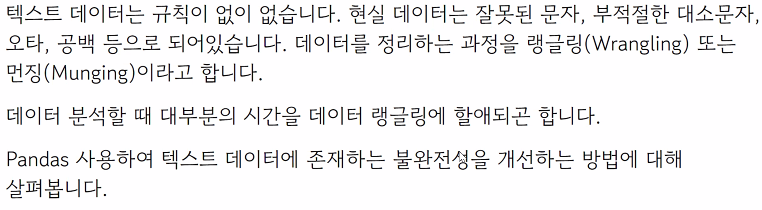

## > 대소문자 변환과 공백 처리하기

In [146]:
inspections = pd.read_csv("datas/chicago_food_inspections.csv")

In [147]:
# 식품의 위험도를 표현/ all 값은 최악이라는 의미
inspections.Risk.value_counts()

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
All                    19
Name: Risk, dtype: int64

In [117]:
# 데이터가 대소문자 혼용, 앞뒤 공백 규칙 다름 등 비정형화된 데이터의 형태를 보인다 (확인)
inspections["Name"]

0                 MARRIOT MARQUIS CHICAGO   
1                                JETS PIZZA 
2                                 ROOM 1520 
3                  MARRIOT MARQUIS CHICAGO  
4                              CHARTWELLS   
                         ...                
153805                           WOLCOTT'S  
153806       DUNKIN DONUTS/BASKIN-ROBBINS   
153807                             Cafe 608 
153808                          mr.daniel's 
153809                           TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [118]:
inspections["Name"].head().values

array([' MARRIOT MARQUIS CHICAGO   ', ' JETS PIZZA ', '   ROOM 1520 ',
       '  MARRIOT MARQUIS CHICAGO  ', ' CHARTWELLS   '], dtype=object)

## > Series 객체의 str 속성 활용하기

In [ ]:
# str의 속성을 조회해보면 StingMethods객체를 얻을 수 있음을 확인할 수 있다.
inspections["Name"].str

## > 문자열의 strip 계열 메서드

In [120]:
# 문자열의 공백을 제거해주는 strip 계열의 메서드
# stringmethod에서 사용 가능
dessert = " cheesecake "
dessert.lstrip()

'cheesecake '

In [121]:
dessert.rstrip()

' cheesecake'

In [122]:
dessert.strip()

'cheesecake'

## > StringMethods의 strip 메서드

In [123]:
inspections["Name"].str.lstrip().head(3)

0    MARRIOT MARQUIS CHICAGO   
1                   JETS PIZZA 
2                    ROOM 1520 
Name: Name, dtype: object

In [124]:
inspections["Name"].str.rstrip().head(3)

0     MARRIOT MARQUIS CHICAGO
1                  JETS PIZZA
2                   ROOM 1520
Name: Name, dtype: object

In [125]:
inspections["Name"].str.strip().head(3)

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
Name: Name, dtype: object

In [126]:
# 공백을 제거한 값으로 변경하기위해 재할당
inspections["Name"] = inspections["Name"].str.strip()

In [127]:
inspections.columns

Index(['Name', 'Risk'], dtype='object')

In [128]:
# 컬럼의 개수가 많은 경우 for 문을 돌려 전체에 제거
for column in inspections.columns:
    inspections[column] = inspections[column].str.strip()

In [129]:
inspections["Name"].str.lower().head()

0    marriot marquis chicago
1                 jets pizza
2                  room 1520
3    marriot marquis chicago
4                 chartwells
Name: Name, dtype: object

In [130]:
inspections["Name"].str.title().head()

0    Marriot Marquis Chicago
1                 Jets Pizza
2                  Room 1520
3    Marriot Marquis Chicago
4                 Chartwells
Name: Name, dtype: object

## > Risk 컬럼 파악하기 Series.unique() 메서드

In [131]:
inspections["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

## > Risk  컬럼의 모든 값을 일관된 형식으로 처리하기

In [132]:
# 결측치 제거
inspections = inspections.dropna(subset=["Risk"])

In [133]:
inspections["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All'],
      dtype=object)

## > DataFrame replace() 메서드로 값 치환하기

In [135]:
# All 문자열을 Risk 4(Extreme)으로 치환
inspections = inspections.replace(
    to_replace = "All", value = "Risk 4 (Extreme)")

In [136]:
inspections["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
       'Risk 4 (Extreme)'], dtype=object)

## > 문자열 인덱싱

In [142]:
# 인덱싱을 통해 하나의 문자 추출 / Risk 숫자
inspections["Risk"].str[5].astype("i").head()

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: int32

## > 문자열 슬라이싱

In [150]:
# 슬라이싱을 통한 부분 문자열 추출
# category로 타입을 만들어주면 메모리가 효율적

inspections["Risk"].str[8:-1].astype("category").head()

0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: category
Categories (4, object): ['', 'High', 'Low', 'Medium']

## > 일치하는 문자열 필터링하기 contains() 메서드

In [152]:
inspections.Name = inspections.Name.str.strip()

In [155]:
# 포함관계를 따질때에는 contains라는 메서드 활용
has_pizza = inspections["Name"].str.lower().str.contains("pizza")
inspections[has_pizza]

,Name,Risk
1,JETS PIZZA,Risk 2 (Medium)
19,NANCY'S HOME OF STUFFED PIZZA,Risk 1 (High)
27,"NARY'S GRILL & PIZZA ,INC.",Risk 1 (High)
29,NARYS GRILL & PIZZA,Risk 1 (High)
68,COLUTAS PIZZA,Risk 1 (High)
...,...,...
153756,ANGELO'S STUFFED PIZZA CORP,Risk 1 (High)
153764,COCHIAROS PIZZA #2,Risk 1 (High)
153772,FERNANDO'S MEXICAN GRILL & PIZZA,Risk 1 (High)
153788,REGGIO'S PIZZA EXPRESS,Risk 1 (High)


## > 특정 문자열로 시작되는 문자열 추출 startswith() 메서드

In [158]:
starts_with_tacos = (
    inspections["Name"].str.lower().str.startswith("tacos"))
inspections[starts_with_tacos]

,Name,Risk
69,TACOS NIETOS,Risk 1 (High)
556,TACOS EL TIO 2 INC.,Risk 1 (High)
675,TACOS DON GABINO,Risk 1 (High)
958,TACOS EL TIO 2 INC.,Risk 1 (High)
1036,TACOS EL TIO 2 INC.,Risk 1 (High)
...,...,...
143587,TACOS DE LUNA,Risk 1 (High)
144026,TACOS GARCIA,Risk 1 (High)
146174,Tacos Place's 1,Risk 1 (High)
147810,TACOS MARIO'S LIMITED,Risk 1 (High)


In [159]:
ends_with_tacos = (
    inspections["Name"].str.lower().str.endswith("tacos"))
inspections[ends_with_tacos]

,Name,Risk
382,LAZO'S TACOS,Risk 1 (High)
569,LAZO'S TACOS,Risk 1 (High)
2652,FLYING TACOS,Risk 3 (Low)
3250,JONY'S TACOS,Risk 1 (High)
3812,PACO'S TACOS,Risk 1 (High)
...,...,...
151121,REYES TACOS,Risk 1 (High)
151318,EL MACHO TACOS,Risk 1 (High)
151801,EL MACHO TACOS,Risk 1 (High)
153087,RAYMOND'S TACOS,Risk 1 (High)


## > DataFrame 다중 인덱스

In [167]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C1", "C2", "C1", "C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

In [176]:
# column 인덱스들의 이름 지정은 columns 객체의 names 속성에 리스트를 넣어서 지정
df3.columns.names = ["Cidx1", "Cidx2"]
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [169]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id1    1.76  0.40  0.98  2.24
      id2    1.87 -0.98  0.95 -0.15
      id3   -0.10  0.41  0.14  1.45
F     id1    0.76  0.12  0.44  0.33
      id2    1.49 -0.21  0.31 -0.85
      id3   -2.55  0.65  0.86 -0.74

## > DataFrame row 인덱스와 column 인덱스 교환

In [170]:
# 반시계 방향으로 90도 회전한 것과 비슷
df4.stack("Cidx1")

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id1   A      1.76  0.40
            B      0.98  2.24
      id2   A      1.87 -0.98
            B      0.95 -0.15
      id3   A     -0.10  0.41
            B      0.14  1.45
F     id1   A      0.76  0.12
            B      0.44  0.33
      id2   A      1.49 -0.21
            B      0.31 -0.85
      id3   A     -2.55  0.65
            B      0.86 -0.74

In [171]:
df4.unstack("Ridx2")

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2   id1   id2   id3   id1   id2   id3   id1   id2   id3   id1   id2   id3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [172]:
df4.stack(0)

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id1   A      1.76  0.40
            B      0.98  2.24
      id2   A      1.87 -0.98
            B      0.95 -0.15
      id3   A     -0.10  0.41
            B      0.14  1.45
F     id1   A      0.76  0.12
            B      0.44  0.33
      id2   A      1.49 -0.21
            B      0.31 -0.85
      id3   A     -2.55  0.65
            B      0.86 -0.74

#### -> 인덱스를 지정할 때는 문자열 이름과 순서를 표시하는 숫자 인덱스를 모두 사용 할 수 있다.

## > DataFrame 다중 인덱스가 있는 경우의 인덱싱

In [177]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [178]:
df3[("B", "C1")]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [179]:
df3.loc[0, ("B", "C1")]

0.98

In [180]:
# 값 할당
df3.loc[0, ("B", "C1")] = 100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

In [181]:
# iloc인덱서를 사용하는 경우에는 튜플 형태의 다중인덱스를 사용할 수 없습니다.
# 구조와 관계없이 0, 1, 2, 3 순으로 찾아감
df3.iloc[0, 2]

100.0

In [182]:
df3['A']

Cidx2,C1,C2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


In [183]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id1    1.76  0.40  0.98  2.24
      id2    1.87 -0.98  0.95 -0.15
      id3   -0.10  0.41  0.14  1.45
F     id1    0.76  0.12  0.44  0.33
      id2    1.49 -0.21  0.31 -0.85
      id3   -2.55  0.65  0.86 -0.74

In [186]:
df4.loc[("M", "id1"), ("A", "C")]

1.76

In [187]:
df4.loc[:, ("A", "C")]

Ridx1  Ridx2
M      id1      1.76
       id2      1.87
       id3     -0.10
F      id1      0.76
       id2      1.49
       id3     -2.55
Name: (A, C), dtype: float64

In [188]:
df4.loc[("M", "id1"), :]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id1), dtype: float64

In [189]:
df4.loc[("All", "All"), :] = df4.sum()
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id1    1.76  0.40  0.98  2.24
      id2    1.87 -0.98  0.95 -0.15
      id3   -0.10  0.41  0.14  1.45
F     id1    0.76  0.12  0.44  0.33
      id2    1.49 -0.21  0.31 -0.85
      id3   -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [191]:
# loc를 사용하는 경우에도 튜플이 아닌 하나의 값만 쓰면 가장 상위의 인덱스를 지정한 것과 같습니다.
df4.loc["M"]

Cidx1     A           B      
Cidx2     C     D     C     D
Ridx2                        
id1    1.76  0.40  0.98  2.24
id2    1.87 -0.98  0.95 -0.15
id3   -0.10  0.41  0.14  1.45

In [192]:
# 인덱스의 튜플 내에서는 콜론(:), 즉 슬라이스의 기호를 사용할 수 없고 대신 slice(None)값 사용해야 합니다.
df4.loc[("M", slice(None)), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id1    1.76  0.40  0.98  2.24
      id2    1.87 -0.98  0.95 -0.15
      id3   -0.10  0.41  0.14  1.45

In [194]:
# 콜론(:)은 대괄호안에서만 사용가능하다.
df4.loc[(slice(None), "id1"), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id1    1.76  0.40  0.98  2.24
F     id1    0.76  0.12  0.44  0.33

## > DataFrame 다중 인덱스의 인덱스 순서 교환

In [195]:
# swaplevel(i,j,axis)
df6 = df4.swaplevel("Cidx1", "Cidx2", 1)
df6

Cidx2           C     D     C     D
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id1    1.76  0.40  0.98  2.24
      id2    1.87 -0.98  0.95 -0.15
      id3   -0.10  0.41  0.14  1.45
F     id1    0.76  0.12  0.44  0.33
      id2    1.49 -0.21  0.31 -0.85
      id3   -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [196]:
df5 = df4.swaplevel("Ridx1", "Ridx2")
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id1   M      1.76  0.40  0.98  2.24
id2   M      1.87 -0.98  0.95 -0.15
id3   M     -0.10  0.41  0.14  1.45
id1   F      0.76  0.12  0.44  0.33
id2   F      1.49 -0.21  0.31 -0.85
id3   F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

## > DataFrame 다중 인덱스가 있는 경우의 정렬

In [197]:
df5.sort_index(level=0)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id1   F      0.76  0.12  0.44  0.33
      M      1.76  0.40  0.98  2.24
id2   F      1.49 -0.21  0.31 -0.85
      M      1.87 -0.98  0.95 -0.15
id3   F     -2.55  0.65  0.86 -0.74
      M     -0.10  0.41  0.14  1.45

In [198]:
df6.sort_index(axis=1, level=0)

Cidx2           C           D      
Cidx1           A     B     A     B
Ridx1 Ridx2                        
M     id1    1.76  0.98  0.40  2.24
      id2    1.87  0.95 -0.98 -0.15
      id3   -0.10  0.14  0.41  1.45
F     id1    0.76  0.44  0.12  0.33
      id2    1.49  0.31 -0.21 -0.85
      id3   -2.55  0.86  0.65 -0.74
All   All    3.23  3.68  0.39  2.28

## > DataFrame 합성

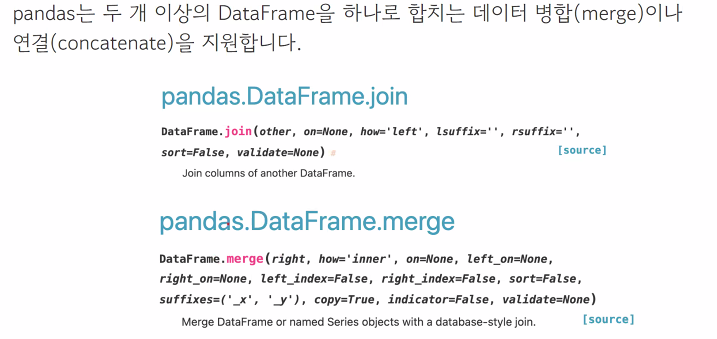

## > DataFrame merge()

In [199]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']},
    columns = ['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [203]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]}, 
    columns = ['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [204]:
# 공통 column인 고객번호 column을 기준으로 데이터를 찾아서 합칩니다.
# 양쪽 DataFrame에 모두 키가 존재하는 데이터만 보여주는 inner join 방식
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [206]:
# outer join 방식은 키 값이 한쪽에만 있어도 데이터를 보여줍니다.
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [207]:
# left 는 첫번째 인수 기준으로 Right는 두번째 인수기준으로 DataFrame의 키값을 모두 보여줍니다.
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [208]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [209]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginice', 'virginice'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns = ['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginice,1.5
3,virginice,1.3


In [210]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginice', 'virginice', 'setosa'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns = ['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginice,0.3
2,virginice,0.5
3,setosa,0.3


## > DataFrame 그룹 분석

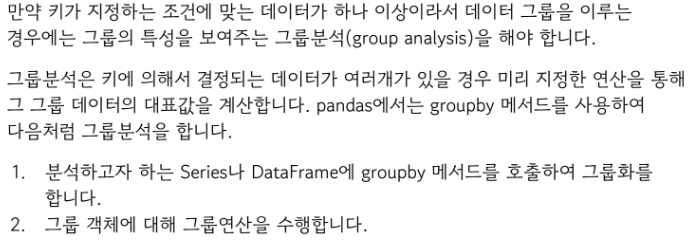

## > DataFrame groupby()

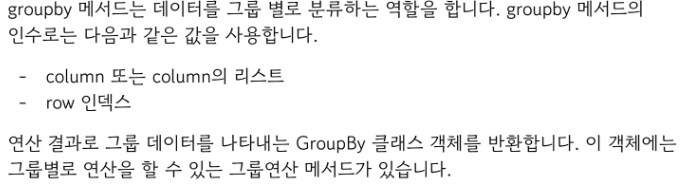

## > DataFrame 그룹 연산 메서드

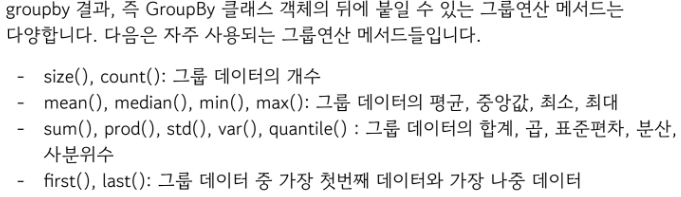

In [212]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': list('AABBA'),
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [213]:
# groupby 명령을 사용하여 그룹 A와 그룹B로 구분한 그룹데이터를 만든다.
groups = df2.groupby(df2.key1)
groups

In [214]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [215]:
# A그룹과 B그룹 데이터의 합계를 구하기 위해 sum이라는 그룹연산을 한다.
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [217]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [220]:
df2.groupby(df2.key1)["data1"].sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [221]:
df2.groupby(df2.key1).sum()["data1"]

key1
A    8
B    7
Name: data1, dtype: int64

In [223]:
# 분석하고자 하는 키가 복수이면 리스트를 사용합니다.
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

## > DataFrame 시계열 자료 다루기 DatetimeIndex

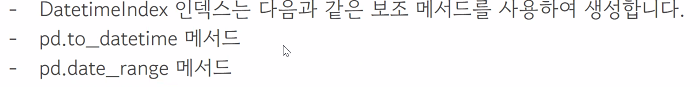

In [226]:
# 날짜/시간을 나타내는 문자열을 자동으로 datetime자료형으로 바꾼 후 DatetimeIndex자료형 인덱스를 생성합니다.
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [227]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

In [228]:
# freq = D는 하루하루를 의미
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [234]:
pd.date_range(start="2018-4-1", periods=30, freq='W')

DatetimeIndex(['2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29', '2018-05-06', '2018-05-13', '2018-05-20',
               '2018-05-27', '2018-06-03', '2018-06-10', '2018-06-17',
               '2018-06-24', '2018-07-01', '2018-07-08', '2018-07-15',
               '2018-07-22', '2018-07-29', '2018-08-05', '2018-08-12',
               '2018-08-19', '2018-08-26', '2018-09-02', '2018-09-09',
               '2018-09-16', '2018-09-23', '2018-09-30', '2018-10-07',
               '2018-10-14', '2018-10-21'],
              dtype='datetime64[ns]', freq='W-SUN')

In [235]:
# B : 평일
# W : 일요일
# W-MON : 월요일
# M : 각달의 마지막날
# MS : 각 달의 첫날
# BM : 주말이 아닌 평일 중 각달의 마지막 날
# 링크 참조 https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [238]:
# 날짜 이동
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range("2018-1-1", periods=4, freq="M"))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [239]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [240]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [241]:
ts.shift(1, freq="M")

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [243]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [244]:
# 연도 빼내기
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [245]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

In [247]:
# 문자열을 만드는 것도 가능하다
s.dt.strftime("%Y년 %m월 %d일")

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

In [272]:
# 연습문제
import seaborn as sns 
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [273]:
def change_boolean(value):
    if value == 'yes':
        return True
    else:
        return False
    
titanic["alive"] = titanic["alive"].apply(change_boolean)

titanic.alive

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: alive, Length: 891, dtype: bool